In [ ]:
# Ignore warnings
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

# import the necessary Python libraries Numpy, Pandas and Matplotlib with their usual shorthand notation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
from numpy import median
from sklearn.preprocessing import StandardScaler
import calendar
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Hotel Cancellation**

Feature name  | Type | Description
-------------------|------------------|-------------
ADR|Float|Average Daily Rate. Calculated by dividing the sum of all lodging transactions by the total number of staying nights.
Adults|Integer|Number of adults.
Agent|Float|ID of the travel agency that made the booking.
ArrivalDateDayOfMonth|Integer|Day of the month of the arrival date.
ArrivalDateMonth|Object|Month of arrival date with 12 categories: “January” to “December”.
ArrivalDateWeekNumber|Integer|Week number of the arrival date.
ArrivalDateYear|Integer|Year of arrival date.
AssignedRoomType|Object|Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
Babies|Integer|Number of babies.
BookingChanges|Integer|Number of changes/amendments made to the booking from the moment the booking was entered on the Property Management System until the moment of check-in or cancellation. Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal.
Children|Float|Number of children. Sum of both payable and non-payable children.
Company|Float|ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
Country|Object|Country of origin. Categories are represented in the International Standards Organization (ISO) 3155–3:2013 format.
CreditCard|Object|Customer credit card number. Artificially created.
CustomerType|Object|Type of booking, assuming one of four categories: Contract (when the booking has an allotment or other type of contract associated to it), Group (when the booking is associated to a group), Transient (when the booking is not part of a group or contract, and is not associated to other transient booking), and Transient-party (when the booking is transient, but is associated to at least other transient booking).
DaysInWaitingList|Integer|Number of days the booking was in the waiting list before it was confirmed to the customer. Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the Property Management System.
DepositType|Object|Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit (no deposit was made), Non Refund (a deposit was made in the value of the total stay cost), and Refundable (a deposit was made with a value under the total cost of stay). Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. In case no payments were found the value is “No Deposit”. If the payment was equal or exceeded the total cost of stay, the value is set as “Non Refund”. Otherwise the value is set as “Refundable”.
DistributionChannel|Object|Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
Email|Object|Customer email. Artificially created.
Hotel|Object|Type of hotel. Categories are presented in City Hotel and Resort Hotel
IsCanceled|Integer|Value indicating if the booking was canceled (1) or not (0).
IsRepeatedGuest|Integer|Value indicating if the booking name was from a repeated guest (1) or not (0). Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the Property Management System database it was assumed the booking was from a repeated guest.
LeadTime|Integer|Number of days that elapsed between the entering date of the booking into the Property Management System and the arrival date. Calculated by subtracting the entering date from the arrival date.
MarketSegment|Object|Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
Meal|Object|Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC (no meal package), BB (Bed & Breakfast), HB (Half board: breakfast and one other meal – usually dinner), and FB (Full board: breakfast, lunch and dinner).
Name|Object|Customer name. Artificially created.
PhoneNumber|Object|Customer phone number. Artificially created.
PreviousBookingsNotCanceled|Integer|Number of previous bookings not canceled by the customer prior to the current booking. In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled.
PreviousCancellations|Integer|Number of previous bookings that were canceled by the customer prior to the current booking. In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled.
RequiredCarParkingSpaces|Integer|Number of car parking spaces required by the customer.
ReservationStatus|Object|Reservation last status, assuming one of three categories: Canceled (booking was canceled by the customer), Check-Out (customer has checked in but already departed), No-Show (customer did not check-in and did inform the hotel of the reason why).
ReservationStatusDate|Object|Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.
ReservedRoomType|Object|Code of room type reserved. Code is presented instead of designation for anonymity reasons.
StaysInWeekendNights|Integer|Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel. Calculated by counting the number of weekend nights from the total number of nights.
StaysInWeekNights|Integer|Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel. Calculated by counting the number of week nights from the total number of nights.
TotalOfSpecialRequests|Integer|Number of special requests made by the customer (e.g. twin bed or high floor).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_booking.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isna().sum() * 100 / len(df)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
df.drop(['company'], axis=1, inplace=True)
#Remove the Company because missing data around 94%

In [ ]:
df['country'].replace(np.nan, 'Others', inplace=True)
#Replace the NaN value of Country to Others 

In [ ]:
df.duplicated().sum()

0

## Data Understanding

In [ ]:
df_clean = df.copy()

In [ ]:
numericals = df_clean.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df_clean.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

#Membagi column yang memiliki tipe data numericals dan categoricals

numericals columns are ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
categoricals columns are ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']


In [ ]:
for col in categoricals:
  print(f"Value counts for column {col}:")
  print(df_clean[col].value_counts())
  print("---"*10)
  print("\n")
#Melihat frekuensi detail

Value counts for column hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
------------------------------


Value counts for column arrival_date_month:
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
------------------------------


Value counts for column meal:
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
------------------------------


Value counts for column country:
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64
------------------------------


Value counts for column market_segment:
Online TA        56477
Offline TA/TO    24219
Gro

In [ ]:
df_clean[numericals].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df['children'].replace(np.nan, 0, inplace=True)
df['children'] = df['children'].astype('int')
#Replace the NaN value of Country to 0 

In [ ]:
df_clean = df_clean[~((df_clean['adults'] == 0) & (df_clean['children'] == 0) & (df_clean['babies'] == 0))]
#Remove if the adults, children, and babies are empty because it's impossible if the value is 0

In [ ]:
df_clean=df.loc[df.adr>=0]
#Remove if adr less than 0 because it's impossible

In [ ]:
df_clean = df_clean[~((df_clean['stays_in_weekend_nights'] == 0) & (df_clean['stays_in_week_nights'] == 0))]
#Remove if the stays_in_weekend_nights and stays_in_week_nights are empty because it's impossible if the value is 0

In [ ]:
df_clean['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df_clean['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df_clean['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df_clean['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
df_clean['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [ ]:
df_clean['agent'] = df_clean['agent'].fillna(df_clean['agent'].mode()[0])
#Fill missing agent with Mode

In [ ]:
mode_ms = df_clean['market_segment'].mode()
mode_dc = df_clean['distribution_channel'].mode()

In [ ]:
df_clean['meal'] = df_clean['meal'].replace({ 'Undefined' : 'SC'})
df_clean['market_segment'] = df_clean['market_segment'].replace({ 'Undefined' : 'Online TA'})
df_clean['distribution_channel'] = df_clean['distribution_channel'].replace({ 'Undefined' : 'TA/TO'})
#Removing the Undefined value

In [ ]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
df_clean.head()
#Total Guest is for combination for adults, children, and babies

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_guests
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,2


In [ ]:
df_clean.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace=True)
#Removing the Name, email, Phone-number, and credit_card because not going to use this column

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118674 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118674 non-null  object 
 1   is_canceled                     118674 non-null  int64  
 2   lead_time                       118674 non-null  int64  
 3   arrival_date_year               118674 non-null  int64  
 4   arrival_date_month              118674 non-null  object 
 5   arrival_date_week_number        118674 non-null  int64  
 6   arrival_date_day_of_month       118674 non-null  int64  
 7   stays_in_weekend_nights         118674 non-null  int64  
 8   stays_in_week_nights            118674 non-null  int64  
 9   adults                          118674 non-null  int64  
 10  children                        118674 non-null  int64  
 11  babies                          118674 non-null  int64  
 12  meal            

## EDA

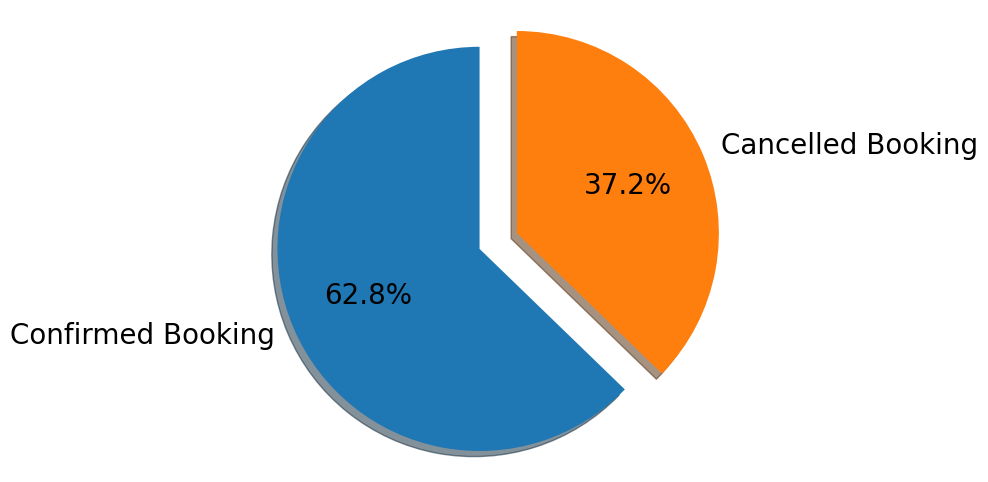

In [ ]:
labels = ['Confirmed Booking',  'Cancelled Booking']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df_clean['is_canceled'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal')
plt.show()

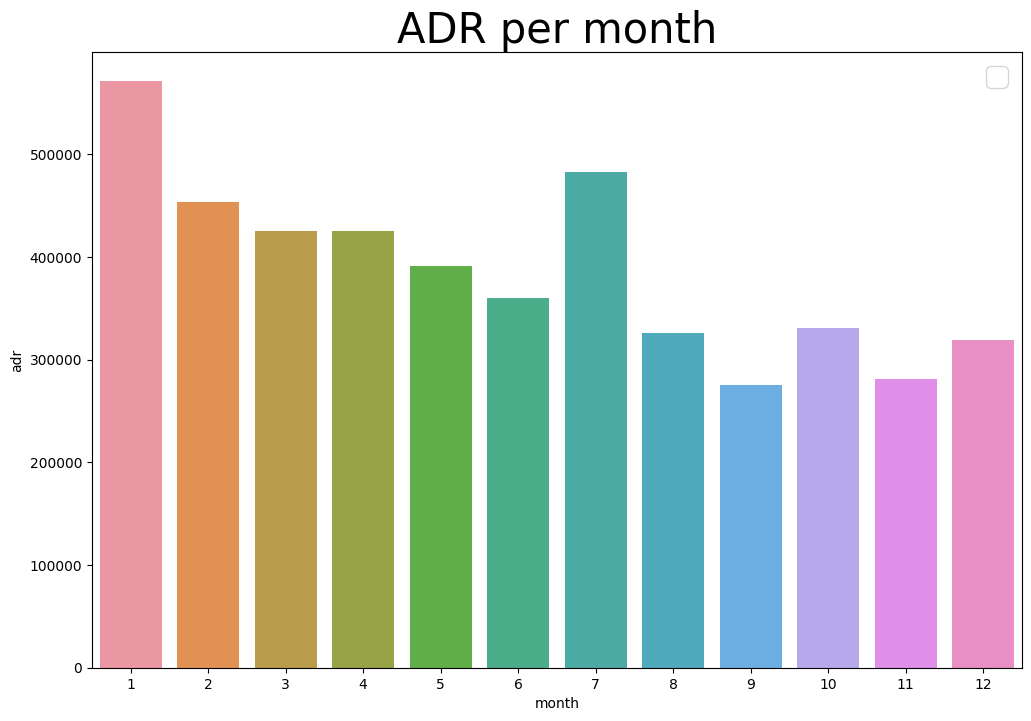

In [ ]:
df_clean['month'] =df_clean['reservation_status_date'].dt.month

plt.figure(figsize=(12, 8))
plt.title('ADR per month', fontsize=30)
sns.barplot(x='month', y='adr', data=df_clean[df_clean['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.legend(fontsize=20)
plt.show()

It's around 37% of guest decide to do booking cancellation

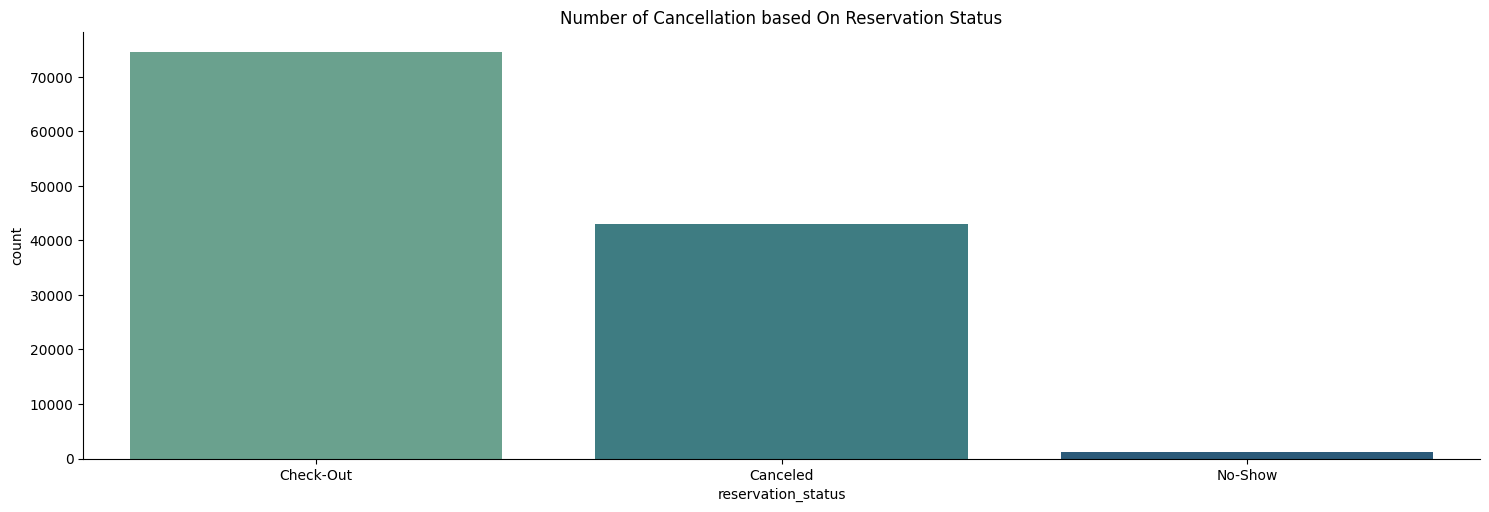

In [ ]:
g = sns.catplot(x = 'reservation_status', data = df_clean, kind = 'count', palette = 'crest', label = 'big', aspect = 3, order = df_clean['reservation_status'].value_counts().index)
plt.title("Number of Cancellation based On Reservation Status")
plt.show()

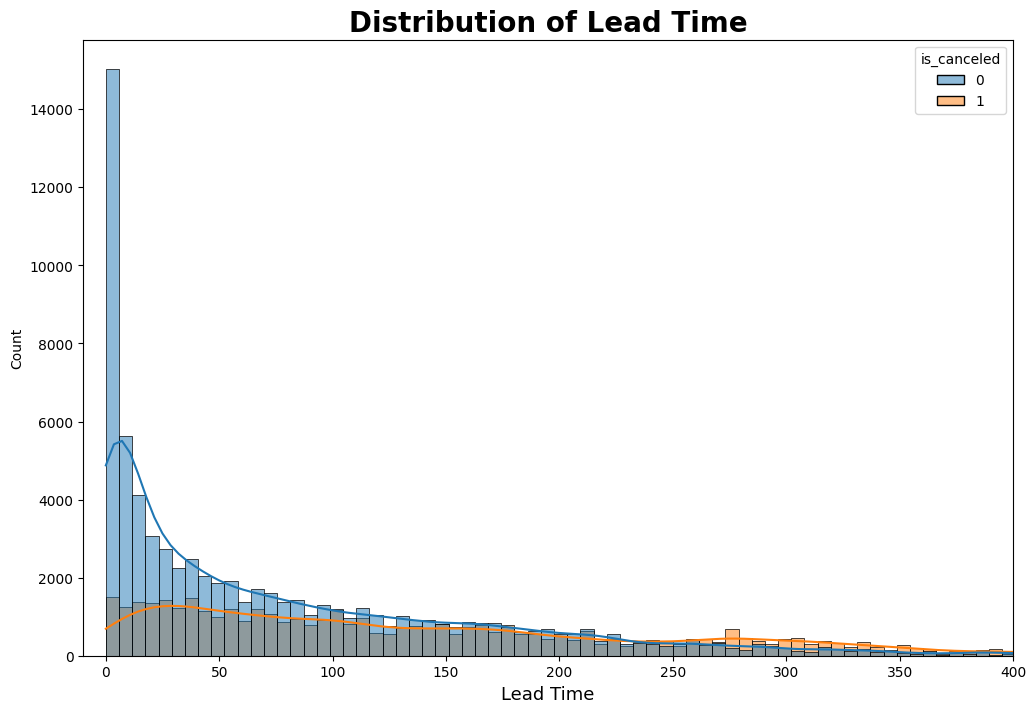

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df_clean,
             x='lead_time', 
             hue='is_canceled', 
             kde=True,
             ax=ax)

ax.set_title('Distribution of Lead Time', fontsize=20, fontweight='bold')
ax.set_xlabel('Lead Time', fontsize=13, fontweight='normal')
ax.set_xlim(-10, 400)

plt.show(fig)

## Hotel Type

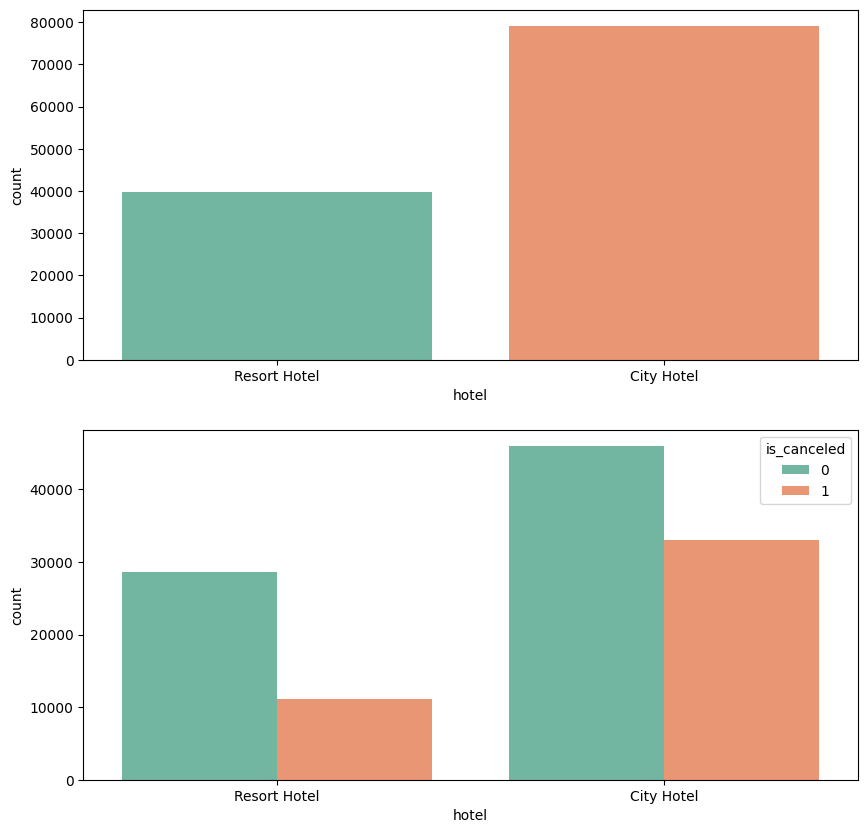

In [ ]:
sns.set_palette('Set2')
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'hotel', data = df_clean, ax = ax[0])
sns.countplot(x = 'hotel', data = df_clean, hue = 'is_canceled', ax = ax[1])
plt.show()

## Repeated Guest

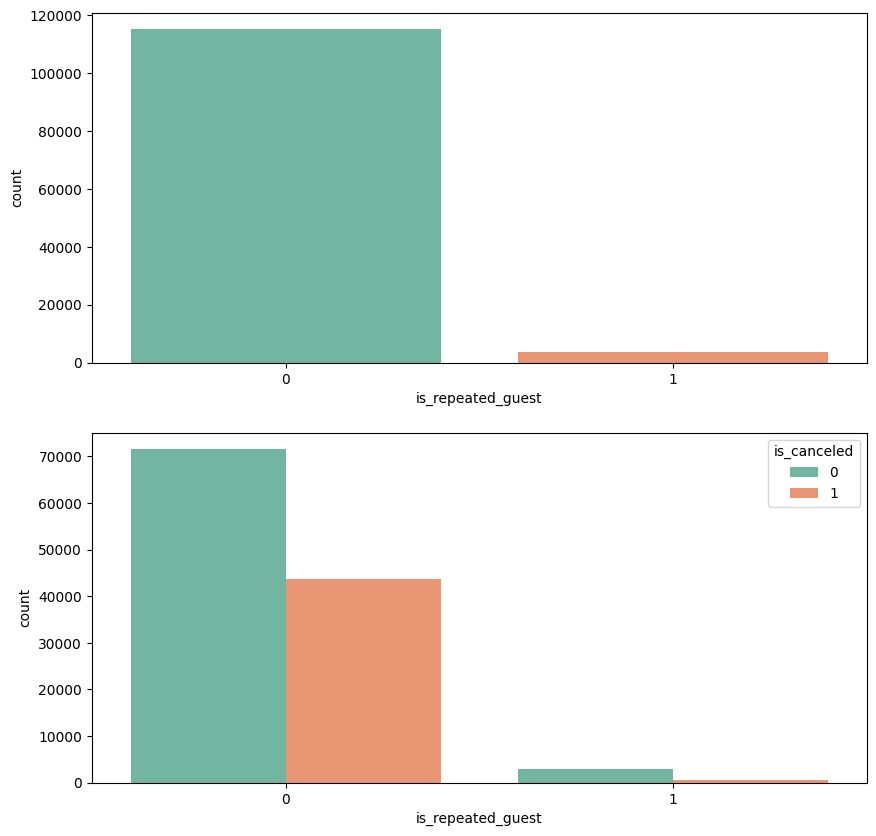

In [ ]:
sns.set_palette('Set2')
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'is_repeated_guest', data = df_clean, ax = ax[0])
sns.countplot(x = 'is_repeated_guest', data = df_clean, hue = 'is_canceled', ax = ax[1])
plt.show()

The hotel has more non-repeated guest and the cancellation doesnt affect whether is repeated guest

## Meal

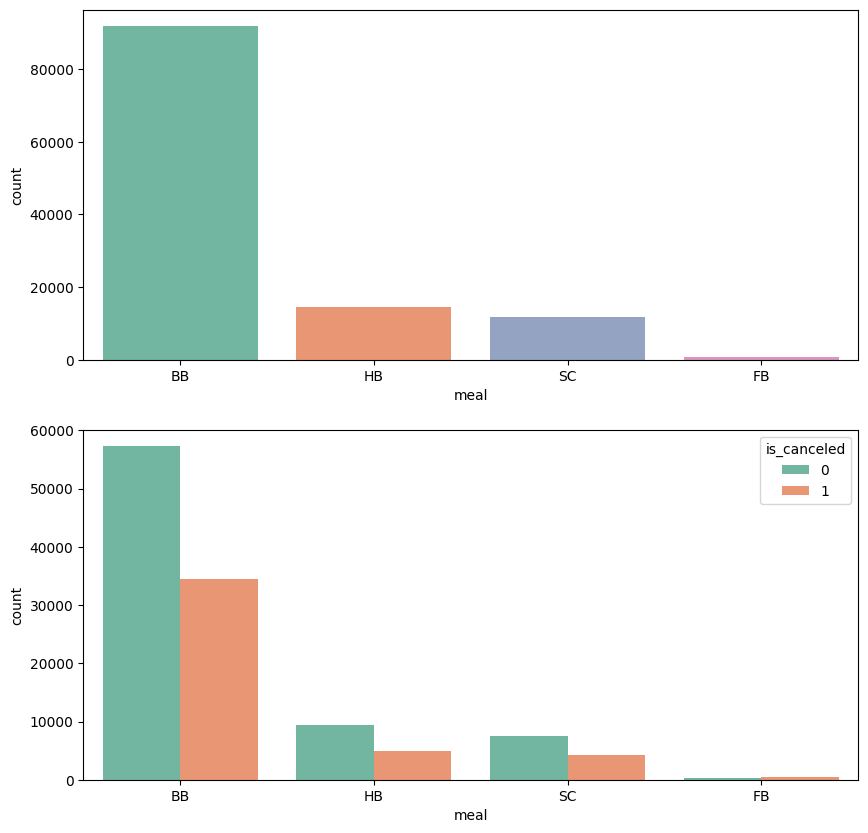

In [ ]:
sns.set_palette('Set2')
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'meal', data = df_clean, ax = ax[0], order = df_clean['meal'].value_counts().index)
sns.countplot(x = 'meal', data = df_clean, hue = 'is_canceled', ax = ax[1], order = df_clean['meal'].value_counts().index)
plt.show()

## Market Segment

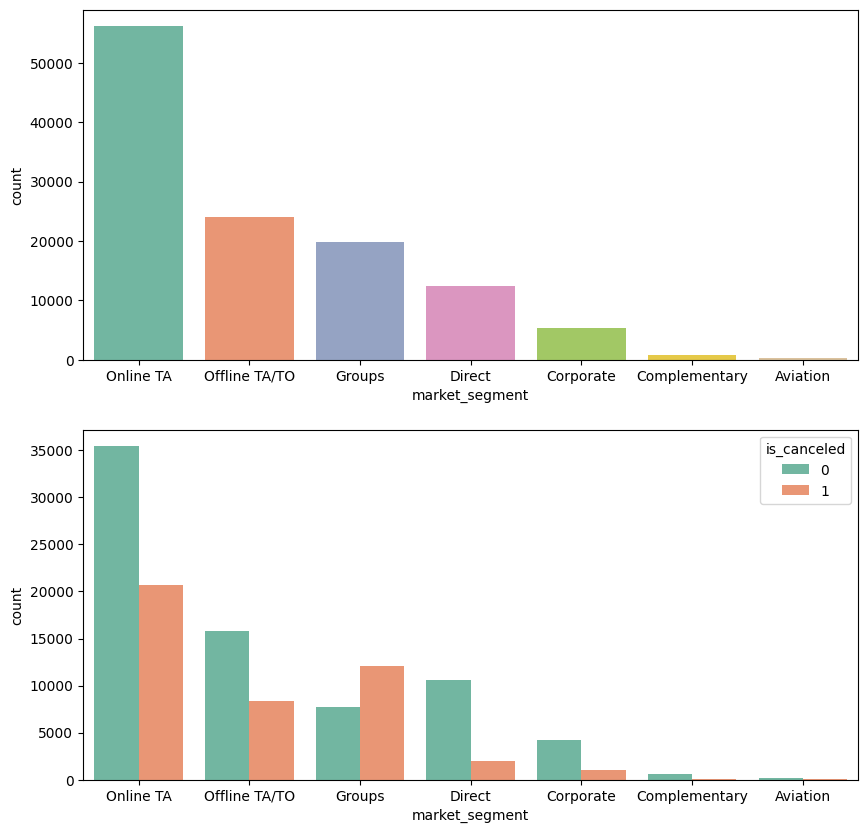

In [ ]:
sns.set_palette('Set2')
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'market_segment', data = df_clean, ax = ax[0], order = df_clean['market_segment'].value_counts().index)
sns.countplot(x = 'market_segment', data = df_clean, hue = 'is_canceled', ax = ax[1], order = df_clean['market_segment'].value_counts().index)
plt.show()

The cancellation is much higher if the guest is from Groups

## Distribution Channel

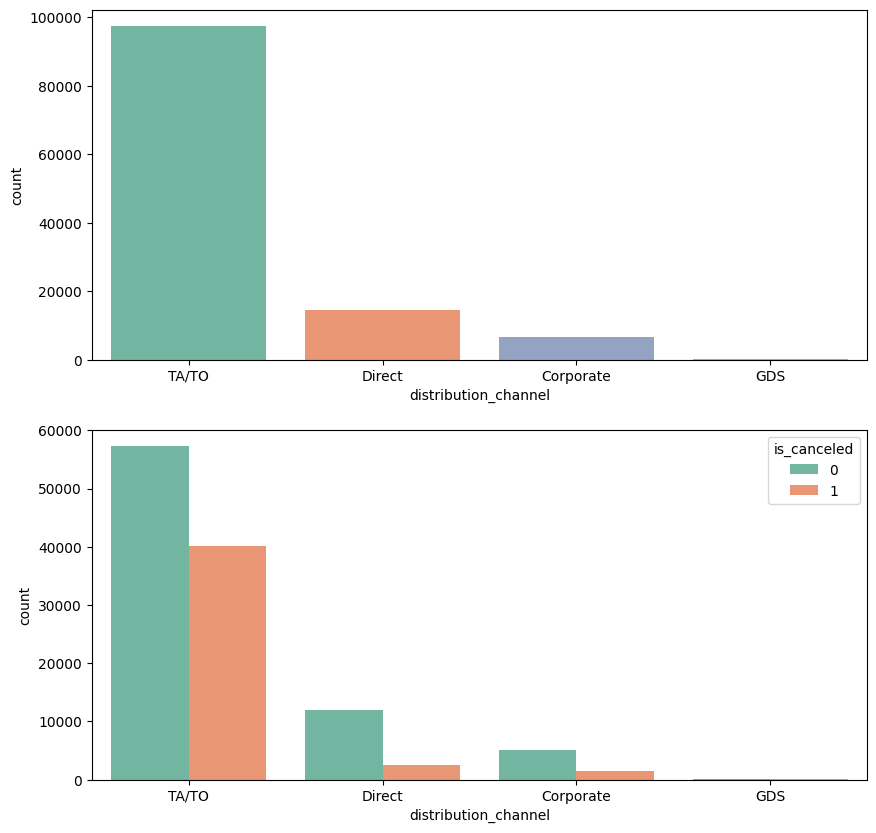

In [ ]:
sns.set_palette('Set2')
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'distribution_channel', data = df_clean, ax = ax[0], order = df_clean['distribution_channel'].value_counts().index)
sns.countplot(x = 'distribution_channel', data = df_clean, hue = 'is_canceled', ax = ax[1], order = df_clean['distribution_channel'].value_counts().index)
plt.show()

## Reserved Room Type

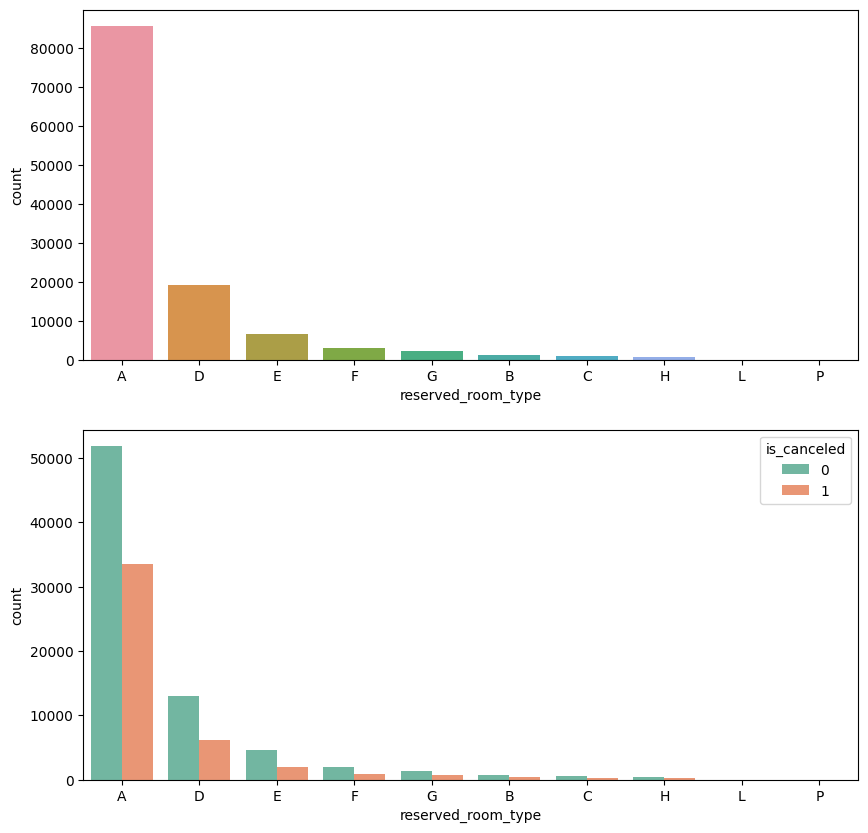

In [ ]:
sns.set_palette('Set2')
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'reserved_room_type', data = df_clean, ax = ax[0], order = df_clean['reserved_room_type'].value_counts().index)
sns.countplot(x = 'reserved_room_type', data = df_clean, hue = 'is_canceled', ax = ax[1], order = df_clean['reserved_room_type'].value_counts().index)
plt.show()

## Deposit Type

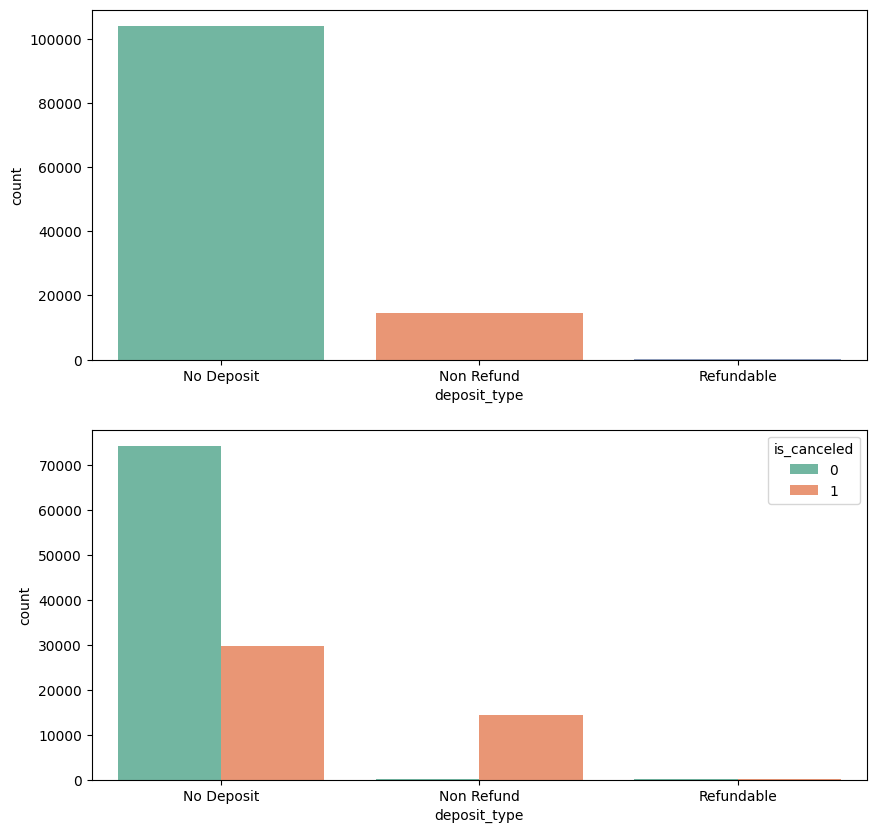

In [ ]:
sns.set_palette('Set2')
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'deposit_type', data = df_clean, ax = ax[0], order = df_clean['deposit_type'].value_counts().index)
sns.countplot(x = 'deposit_type', data = df_clean, hue = 'is_canceled', ax = ax[1], order = df_clean['deposit_type'].value_counts().index)
plt.show()

Non-refund type has more cancellation than not cancelled

## Which Country has the highest guest?

In [ ]:
top_host_country=df_clean.country.value_counts().head(10)
top_host_country

PRT    47996
GBR    12102
FRA    10399
ESP     8551
DEU     7286
ITA     3761
IRL     3374
BEL     2338
BRA     2219
NLD     2102
Name: country, dtype: int64

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

top_host_country=pd.DataFrame(top_host_country)
top_host_country.reset_index(inplace=True)
top_host_country.rename(columns={'index':'country', 'country':'P_Count'}, inplace=True)
top_host_country

,country,P_Count
0,PRT,47996
1,GBR,12102
2,FRA,10399
3,ESP,8551
4,DEU,7286
5,ITA,3761
6,IRL,3374
7,BEL,2338
8,BRA,2219
9,NLD,2102


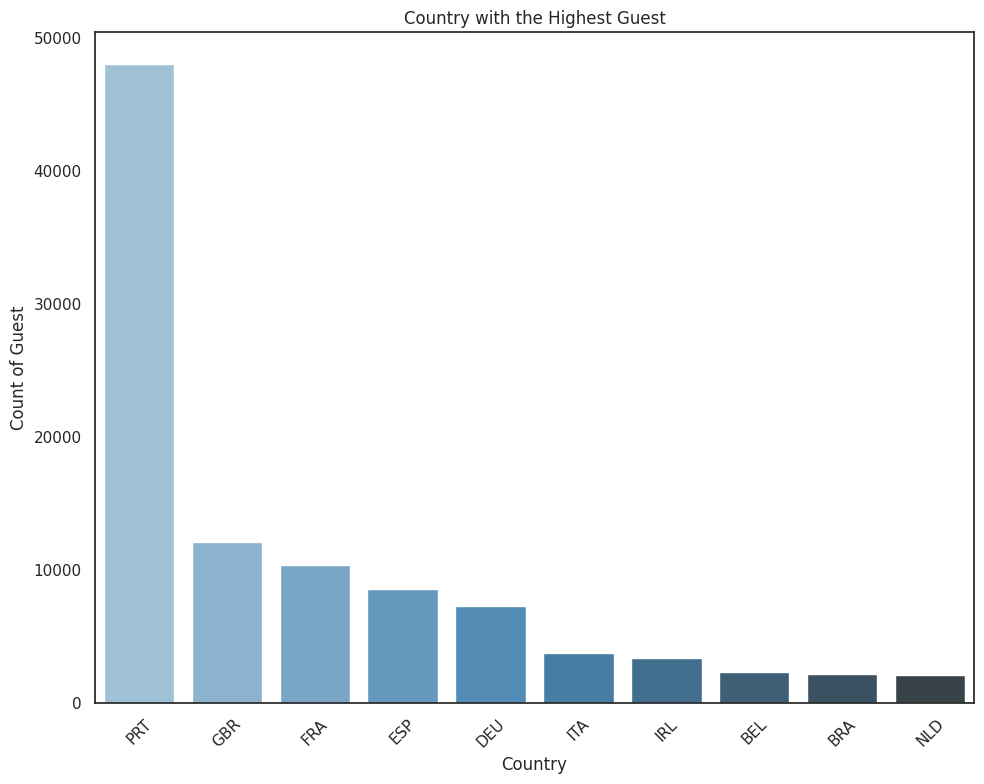

In [ ]:
country_top=sns.barplot(x="country", y="P_Count", data=top_host_country,
                 palette='Blues_d')
country_top.set_title('Country with the Highest Guest')
country_top.set_ylabel('Count of Guest')
country_top.set_xlabel('Country')
country_top.set_xticklabels(country_top.get_xticklabels(), rotation=45)
plt.tight_layout()

The highest guest is from Portugal, Britain, and France. The top 10 guest is from Europe

## When is the peak of the booking is cancelled?

In [ ]:
canceled = df_clean[df_clean['is_canceled'] == 1]
canceled_by_month_year = canceled.pivot_table(index="arrival_date_year", columns="arrival_date_month", aggfunc="count").fillna(0).adr.T
canceled_by_month_year 

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,0.0,2058.0,2458.0
August,1598.0,1825.0,1814.0
December,972.0,1395.0,0.0
February,0.0,1332.0,1356.0
January,0.0,554.0,1250.0
July,1259.0,1498.0,1984.0
June,0.0,2094.0,2439.0
March,0.0,1475.0,1672.0
May,0.0,1914.0,2761.0


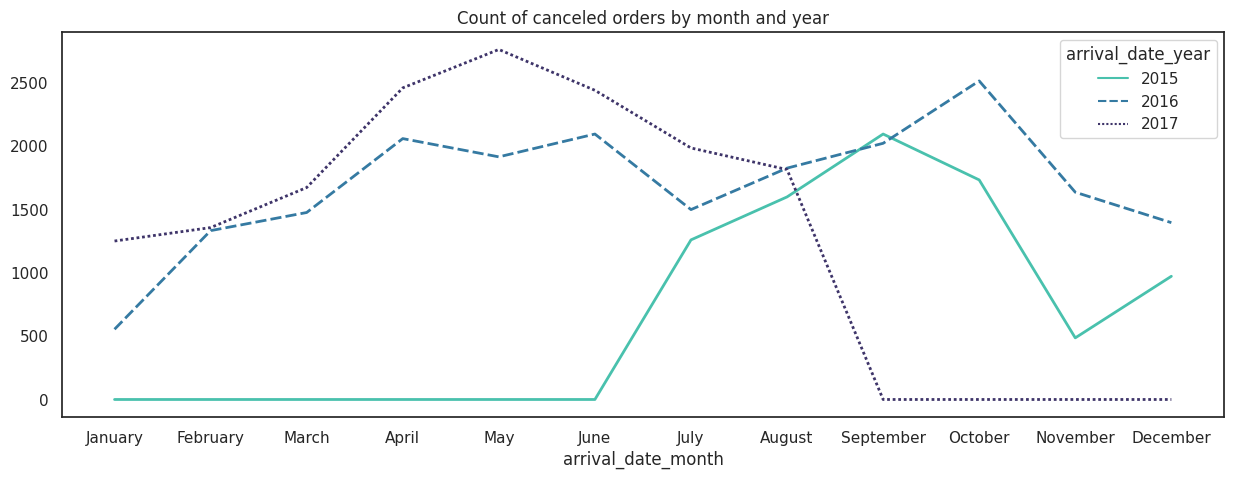

In [ ]:
canceled_by_month_year = canceled_by_month_year.reindex(calendar.month_name[1:])
plt.figure(figsize=(15, 5));
plt.title("Count of canceled orders by month and year");
sns.lineplot(data=canceled_by_month_year, palette="mako_r", linewidth=2);

The cancellation highest:


1.  **(2017: May)**
| If we look the event in 2017, from April - July there are several attacks in Europe. This possibility lead the guest to cancel their hotel
2.   **(2016: October)**
| If we look from August - October, there are peak of cancellation. There are several natural disaster such as earthquake and wildfire
3. **(2015: September)**
| If we look at September, European country has least public holiday. 

[Source](https://en.wikipedia.org/wiki/2015)




## Which month has the highest price?

In [ ]:
data_resort = df_clean[(df_clean['hotel'] == 'Resort Hotel') & (df_clean['is_canceled'] == 0)]
data_city = df_clean[(df_clean['hotel'] == 'City Hotel') & (df_clean['is_canceled'] == 0)]

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']

In [ ]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3440 sha256=ec32c0d331934242a8ec27936ebce7b629b67fdb8368ed1f62a1e7f78c3cac9f
  Stored in directory: /root/.cache/pip/wheels/94/66/fa/f621d4b2c9c3eeb09cbd33697f4bb60bfe9d3d900d3a59329d
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3248 sha256=e31199aed91647dfc8f6770c7f4dc12d025bdb671c60a77e072ccc431bcffd65
  Stored in directory: /root/.cache/pip/wheels/2a/70/02/2addaa9d5ffdc61dcd436a3c6eed123aea9053591367bcf584
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,49.530898,82.859092
1,February,54.620795,87.121343
2,March,57.664902,90.975020
3,April,76.467561,112.136117
4,May,77.824153,121.480509
5,June,109.316486,118.080712
6,July,152.061469,116.024804
7,August,183.117465,118.743090
8,September,96.785215,112.967109
9,October,62.774972,102.740910


In [ ]:
sns.set_palette('Blues_d')
plt.figure(figsize = (10, 10))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months')

<Figure size 1000x1000 with 0 Axes>

Hotel has steady price over the months. However resort peak from July-September due to summer season/holiday season lead the price is rising

## Which type has the highest guest?

In [ ]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','Number of guests']
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','Number of guests']

In [ ]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','Number of guests in resort','Number of guest in city hotel']
final_guests

,month,Number of guests in resort,Number of guest in city hotel
0,August,3223,5366
1,July,3097,4763
2,March,2544,4036
3,October,2534,4295
4,April,2530,4005
5,May,2497,4540
6,February,2288,3031
7,September,2094,4276
8,June,2012,4352
9,December,1965,2363


In [ ]:
final_guests = sort_month(final_guests,'month')
px.line(final_guests, x = 'month', y = ['Number of guests in resort','Number of guest in city hotel'],
        title='Total Number of guests per Months')

Over the months, Resort has the highest of number of guest. Where July -August is the peak seasons for both type of hotel

In [ ]:
df3 = df_clean[(df_clean['is_canceled'] == 0)]
df3['total_night'] = df3['stays_in_weekend_nights'] + df3['stays_in_week_nights']
stay = df3.groupby(['total_night','hotel']).agg(number_of_guest = ('total_night', 'count')).reset_index()
stay = stay.sort_values('number_of_guest', ascending=False).head(15)

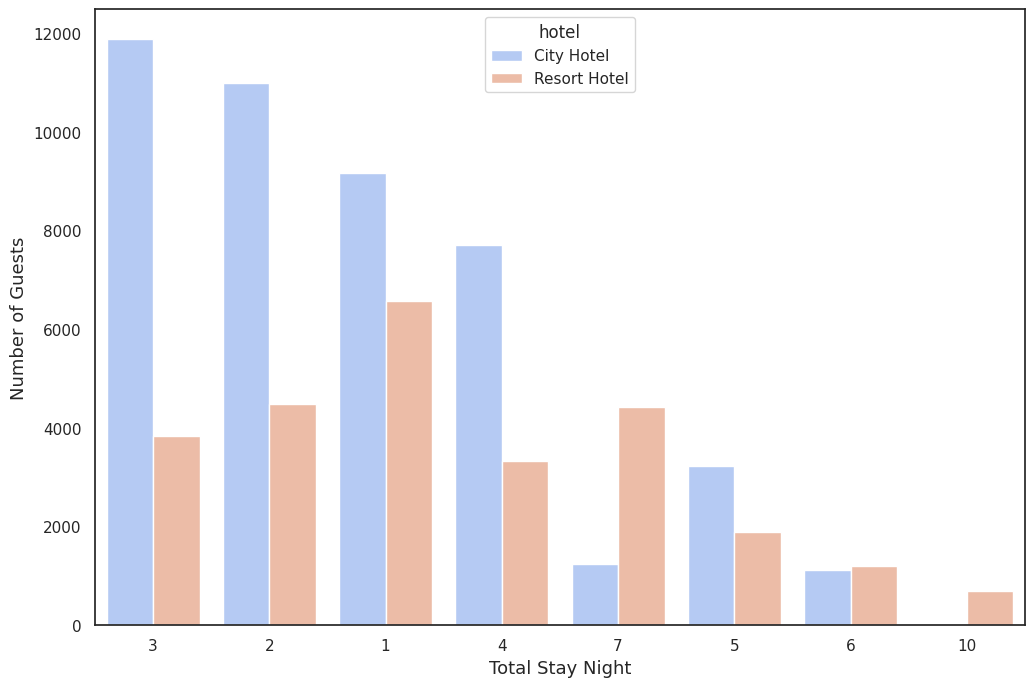

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=stay, x='total_night', y='number_of_guest', hue='hotel' ,palette='coolwarm', order = stay['total_night'].value_counts().index)

ax.set_xlabel('Total Stay Night', fontsize=13, fontweight='normal')
ax.set_ylabel('Number of Guests', fontsize=13, fontweight='normal')
plt.show()

City hotel has the highest guest with total 3 days. Meanwhile Resort has the highest guest with total 1 day. Side note: Resort guest stay much longer than the hotel guest where they could stay more than a week

## Modeling

In [ ]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df_clean.drop(useless_col, axis = 1, inplace = True)

In [ ]:
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_guests,month
2,Resort Hotel,0,7,July,27,1,0,1,1,0,...,A,No Deposit,9.0,Transient,75.0,0,0,2015-07-02,1,7
3,Resort Hotel,0,13,July,27,1,0,1,1,0,...,A,No Deposit,304.0,Transient,75.0,0,0,2015-07-02,1,7
4,Resort Hotel,0,14,July,27,1,0,2,2,0,...,A,No Deposit,240.0,Transient,98.0,0,1,2015-07-03,2,7
5,Resort Hotel,0,14,July,27,1,0,2,2,0,...,A,No Deposit,240.0,Transient,98.0,0,1,2015-07-03,2,7
6,Resort Hotel,0,0,July,27,1,0,2,2,0,...,C,No Deposit,9.0,Transient,107.0,0,0,2015-07-03,2,7


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118674 entries, 2 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118674 non-null  object        
 1   is_canceled                     118674 non-null  int64         
 2   lead_time                       118674 non-null  int64         
 3   arrival_date_month              118674 non-null  object        
 4   arrival_date_week_number        118674 non-null  int64         
 5   arrival_date_day_of_month       118674 non-null  int64         
 6   stays_in_weekend_nights         118674 non-null  int64         
 7   stays_in_week_nights            118674 non-null  int64         
 8   adults                          118674 non-null  int64         
 9   children                        118674 non-null  int64         
 10  babies                          118674 non-null  int64  

In [ ]:
df_clean = df_clean.drop(['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'reservation_status_date'], axis=1)

In [ ]:
df_clean['reserved_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'L', 'B', 'P'], dtype=object)

In [ ]:
df_clean['hotel'] = df_clean['hotel'].map({'City Hotel': 0, 'Resort Hotel': 1}).astype('Int64')
df_clean['meal'] = df_clean['meal'].map({'SC': 0, 'BB': 1,'HB': 2,'FB': 3}).astype('Int64')
df_clean['reserved_room_type'] = df_clean['reserved_room_type'].map({'A': 0, 'B': 1, 'C': 2,'D': 3,'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8,'P':9}).astype('Int64')
df_clean['deposit_type'] = df_clean['deposit_type'].map({'No Deposit': 0, 'Refundable': 1,'Non Refund': 2}).astype('Int64')
df_clean['customer_type'] = df_clean['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

In [ ]:
onehot_columns = ['market_segment','distribution_channel']
df_clean = pd.get_dummies(df_clean, columns = onehot_columns, drop_first=True)
df_clean

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,...,month,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO
2,1,0,7,0,1,1,0,0,1,0,...,7,0,0,1,0,0,0,1,0,0
3,1,0,13,0,1,1,0,0,1,0,...,7,0,1,0,0,0,0,0,0,0
4,1,0,14,0,2,2,0,0,1,0,...,7,0,0,0,0,0,1,0,0,1
5,1,0,14,0,2,2,0,0,1,0,...,7,0,0,0,0,0,1,0,0,1
6,1,0,0,0,2,2,0,0,1,0,...,7,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0,0,1,0,...,9,0,0,0,0,1,0,0,0,1
119386,0,0,102,2,5,3,0,0,1,0,...,9,0,0,0,0,0,1,0,0,1
119387,0,0,34,2,5,2,0,0,1,0,...,9,0,0,0,0,0,1,0,0,1
119388,0,0,109,2,5,2,0,0,1,0,...,9,0,0,0,0,0,1,0,0,1


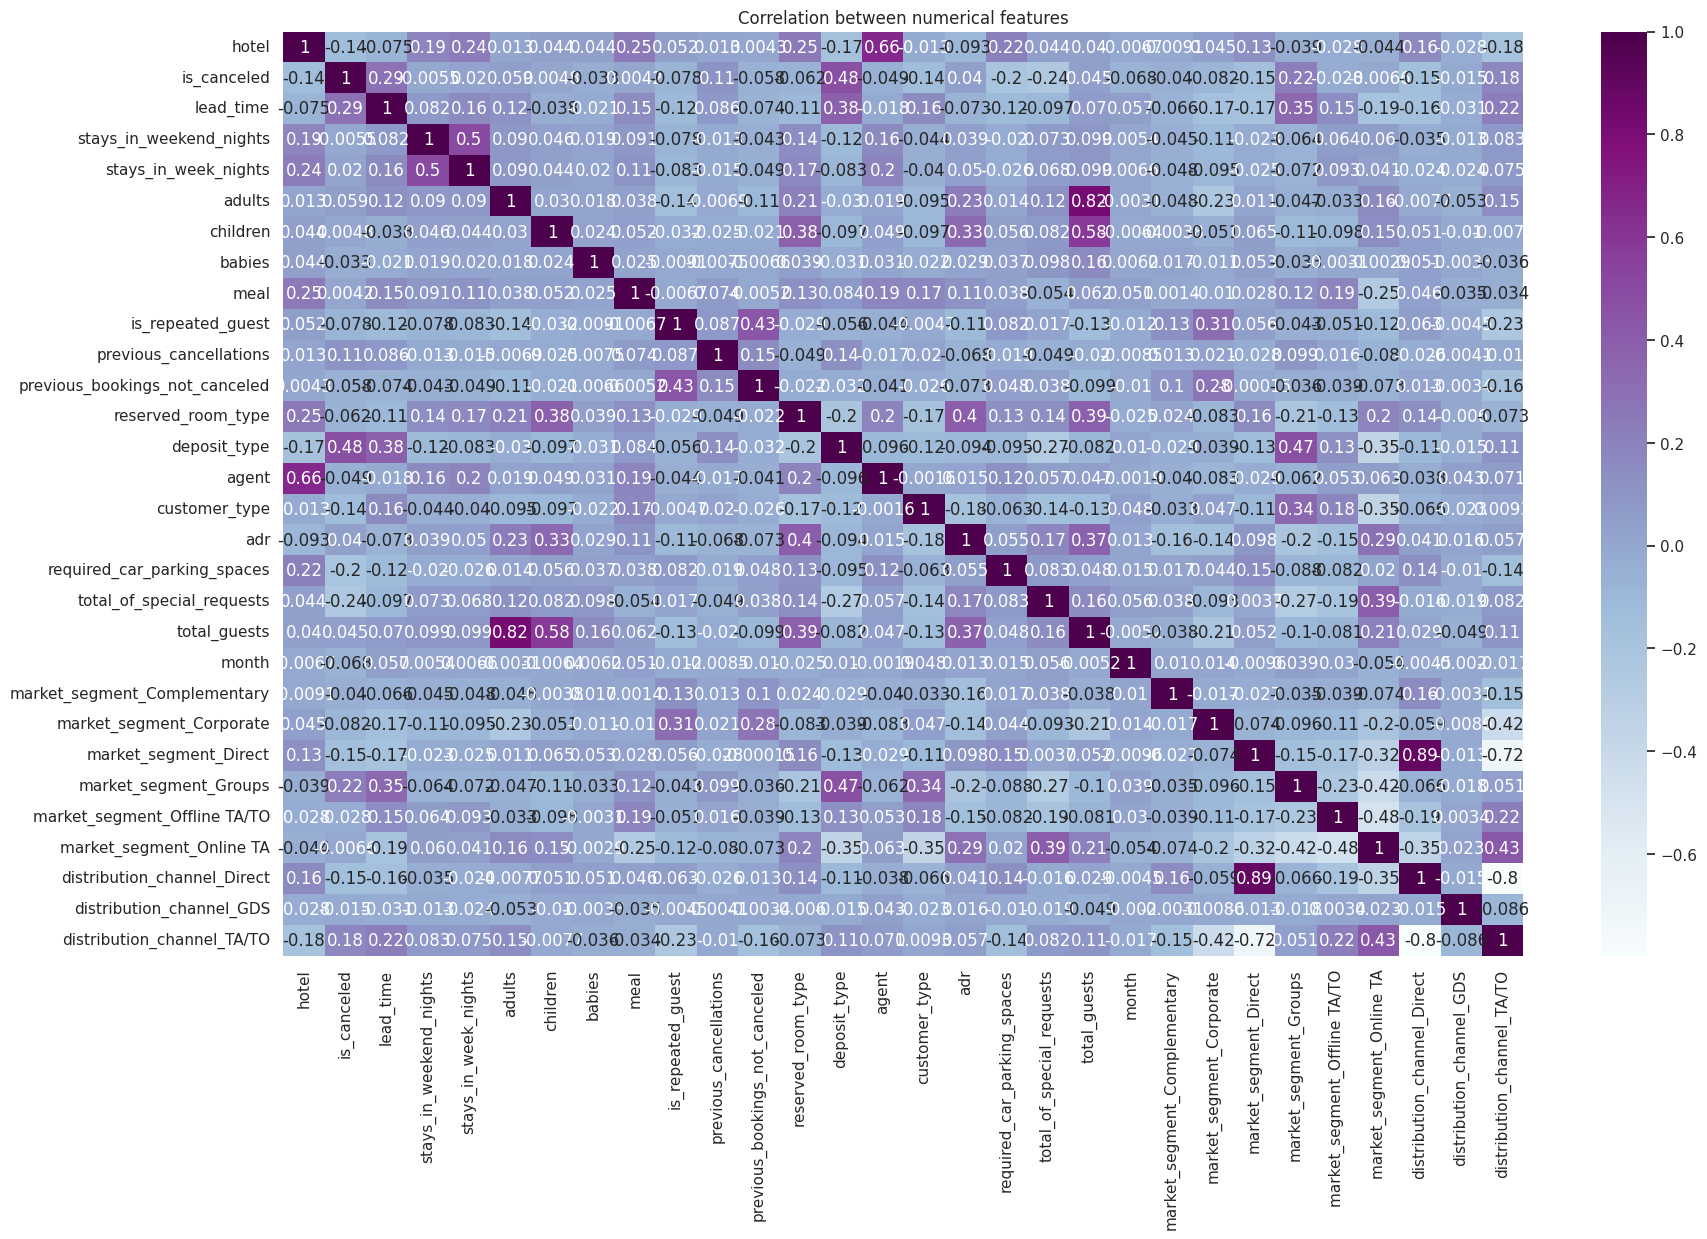

In [ ]:
all_corr = df_clean.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(all_corr, annot=True, cmap='BuPu')
plt.title('Correlation between numerical features')
plt.show()

In [ ]:
df_analysis = df_clean.copy()

In [ ]:
df_analysis.isna().sum() * 100 / len(df)

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
deposit_type                      0.0
agent                             0.0
customer_type                     0.0
adr                               0.0
required_car_parking_spaces       0.0
total_of_special_requests         0.0
total_guests                      0.0
month                             0.0
market_segment_Complementary      0.0
market_segment_Corporate          0.0
market_segment_Direct             0.0
market_segment_Groups             0.0
market_segment_Offline TA/TO      0.0
market_segme

In [ ]:
from sklearn.model_selection import train_test_split

y = df_analysis['is_canceled']
X = df_analysis.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1000 ,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( max_iter=3000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8096508721175182
Confusion Matrix : 
[[20885  1464]
 [ 5313  7941]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     22349
           1       0.84      0.60      0.70     13254

    accuracy                           0.81     35603
   macro avg       0.82      0.77      0.78     35603
weighted avg       0.81      0.81      0.80     35603



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8422604836671067
Confusion Matrix : 
[[20321  2028]
 [ 3588  9666]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     22349
           1       0.83      0.73      0.77     13254

    accuracy                           0.84     35603
   macro avg       0.84      0.82      0.83     35603
weighted avg       0.84      0.84      0.84     35603



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.858410808077971
Confusion Matrix : 
[[19785  2564]
 [ 2477 10777]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     22349
           1       0.81      0.81      0.81     13254

    accuracy                           0.86     35603
   macro avg       0.85      0.85      0.85     35603
weighted avg       0.86      0.86      0.86     35603



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8945594472375923
Confusion Matrix : 
[[21238  1111]
 [ 2643 10611]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22349
           1       0.91      0.80      0.85     13254

    accuracy                           0.89     35603
   macro avg       0.90      0.88      0.88     35603
weighted avg       0.90      0.89      0.89     35603



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8569221694801
Confusion Matrix : 
[[19650  2699]
 [ 2395 10859]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     22349
           1       0.80      0.82      0.81     13254

    accuracy                           0.86     35603
   macro avg       0.85      0.85      0.85     35603
weighted avg       0.86      0.86      0.86     35603



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8304356374462826
Confusion Matrix : 
[[20943  1406]
 [ 4631  8623]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.94      0.87     22349
           1       0.86      0.65      0.74     13254

    accuracy                           0.83     35603
   macro avg       0.84      0.79      0.81     35603
weighted avg       0.83      0.83      0.82     35603



In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.3 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8884644552425357
Confusion Matrix : 
[[21143  1206]
 [ 2765 10489]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22349
           1       0.90      0.79      0.84     13254

    accuracy                           0.89     35603
   macro avg       0.89      0.87      0.88     35603
weighted avg       0.89      0.89      0.89     35603



In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Extra Trees Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_etc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.894559
6,Extra Trees Classifier,0.888464
2,Decision Tree Classifier,0.858411
4,Ada Boost Classifier,0.856922
1,KNN,0.842260
5,Gradient Boosting Classifier,0.830436
0,Logistic Regression,0.809651


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', title = 'Models Comparison')

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (30,40,50,60),
    'max_depth':(15,20,25,30)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, n_jobs = -1, scoring='f1_micro')

rf_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': (15, 20, 25, 30),
                         'n_estimators': (30, 40, 50, 60)},
             scoring='f1_micro')

In [ ]:
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
11,"{'max_depth': 25, 'n_estimators': 60}",0.852885,1
15,"{'max_depth': 30, 'n_estimators': 60}",0.852765,2
9,"{'max_depth': 25, 'n_estimators': 40}",0.852548,3
10,"{'max_depth': 25, 'n_estimators': 50}",0.852536,4
13,"{'max_depth': 30, 'n_estimators': 40}",0.852295,5
8,"{'max_depth': 25, 'n_estimators': 30}",0.852114,6
14,"{'max_depth': 30, 'n_estimators': 50}",0.851958,7
12,"{'max_depth': 30, 'n_estimators': 30}",0.851440,8
7,"{'max_depth': 20, 'n_estimators': 60}",0.847805,9
6,"{'max_depth': 20, 'n_estimators': 50}",0.847757,10


In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     22349
           1       0.86      0.74      0.79     13254

    accuracy                           0.86     35603
   macro avg       0.86      0.83      0.84     35603
weighted avg       0.86      0.86      0.85     35603



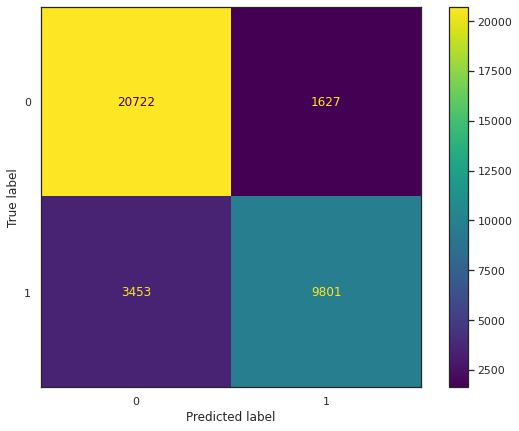

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

1. Predicted Canceled and Actual Canceled: 9801
2. Predicted Not Canceled and Actual Canceled: 3453
3. Predicted Canceled and Actual Not Canceled: 1627
4. Predicted Not Canceled and Actual Not Canceled: 20722